In [1]:
!pip install ultralytics==8.3.50


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 22.4 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/ultralytics/ultralytics.git


  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-1w11zaz6
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-1w11zaz6
  Resolved https://github.com/ultralytics/ultralytics.git to commit 54a33bf5895f360b1a76ed75173b7c646aaffaf9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.185-py3-none-any.whl size=1051688 sha256=b65603a825255a4888dff2d7a9423fb99a0fa658c00d21e11adaac4a1f24ac11
  Stored in directory: /tmp/pip-ephem-wheel-cache-c1w6btle/wheels/07/0b/e8/a9b200841fd9259dec61e092d35594d5de8f3412e26e53cb4d
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.50
    Uninstalling ultralytics-8.3.50:
      Successfully uninstalled ultralytics-8.3.50


In [3]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=d9f0f99501f17bbba7181b4be1c6f5ecad7322b92b442b1f7d007655d02247a4
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [4]:
!pip install git+https://github.com/ultralytics/ultralytics.git grad-cam opencv-python matplotlib



  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-5uwm1xql
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-5uwm1xql
  Resolved https://github.com/ultralytics/ultralytics.git to commit 5b1044c5c78d7736981505aa588de813466af1c5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
from ultralytics import YOLO
from pytorch_grad_cam import EigenCAM


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
!pip install -U gdown
!gdown --folder "16jBWo5uD90GmJIc0Vx5agqrsUpAVg_PI" -O /content/data

Retrieving folder contents
Processing file 1hS9wN6NTHJX9BYPkhPy5N03SYEnGphVt APE.jpg
Processing file 1JWPBof6UbtVwK3nhto-OwCDWxZZvs5xx APE1.jpg
Processing file 12QDsJOw9Vs9_ZUmHANJqQ3cIGTifFRxQ BPE.jpg
Processing file 1mcOrc63MYt6Bdv7cjO9kUr9IMV1UED-q NE.jpg
Processing file 12POe8jATf5ZGhIkPX2bHjKvacywWVjJ_ VPE.jpg
Processing file 15pTIOhWvdUaF9q5IJs2bGSFcAivvTso9 YOLO_OcuLite.pt
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hS9wN6NTHJX9BYPkhPy5N03SYEnGphVt
To: /content/data/APE.jpg
100% 56.5k/56.5k [00:00<00:00, 3.87MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JWPBof6UbtVwK3nhto-OwCDWxZZvs5xx
To: /content/data/APE1.jpg
100% 55.6k/55.6k [00:00<00:00, 2.67MB/s]
Downloading...
From: https://drive.google.com/uc?id=12QDsJOw9Vs9_ZUmHANJqQ3cIGTifFRxQ
To: /content/data/BPE.jpg
100% 37.5k/37.5k [00:00<00:00, 10.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=

[LOAD] Weights: /content/data/YOLO_OcuLite.pt
[INFER] Processing 4 image(s) on cuda


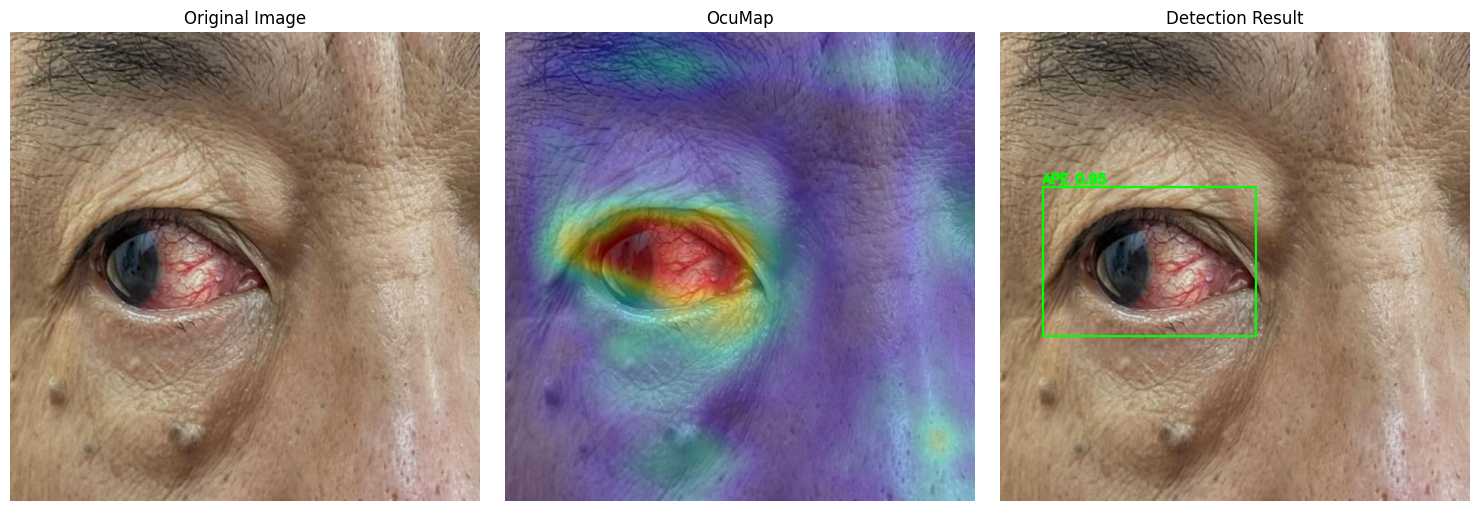

[OK] Saved panels for: APE


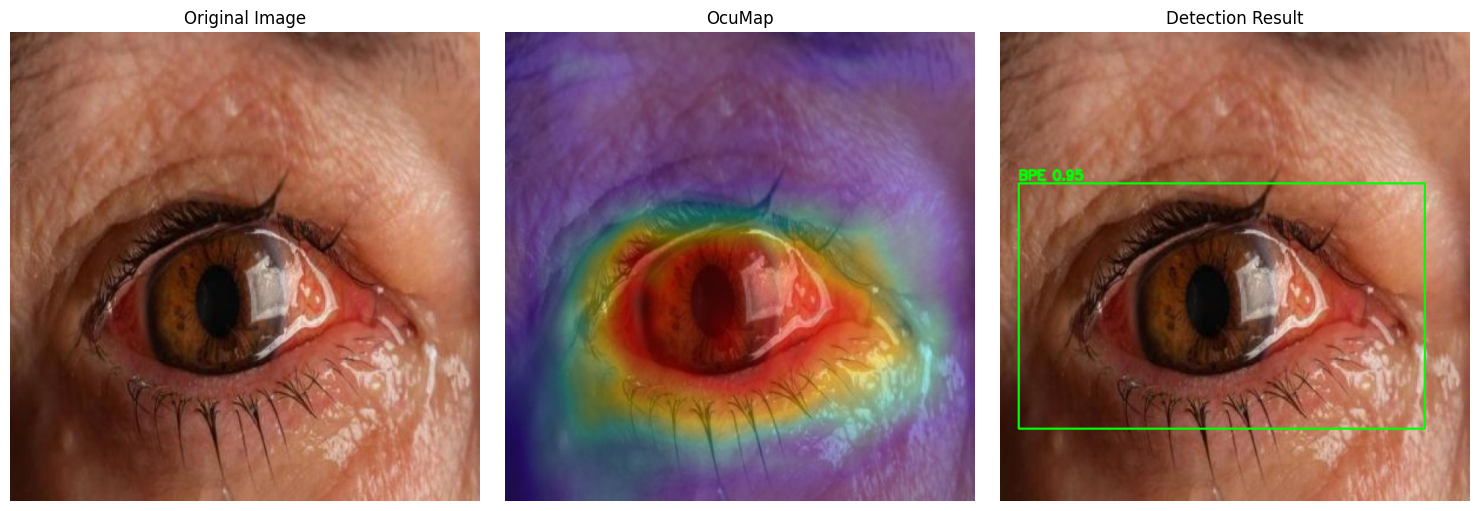

[OK] Saved panels for: BPE


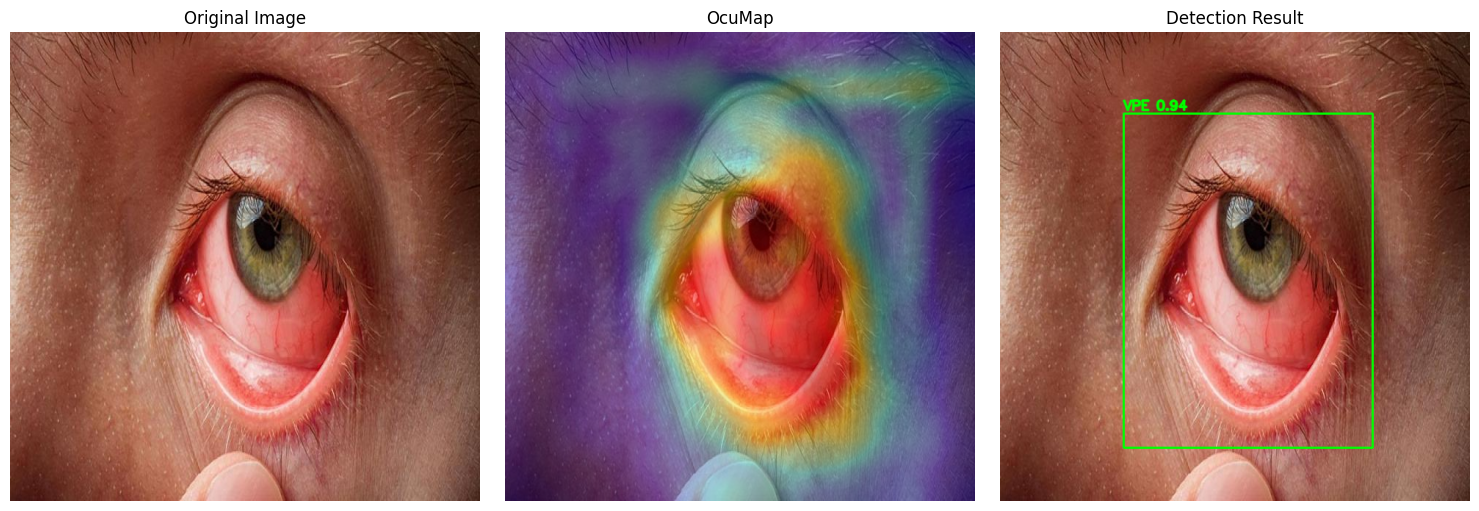

[OK] Saved panels for: VPE


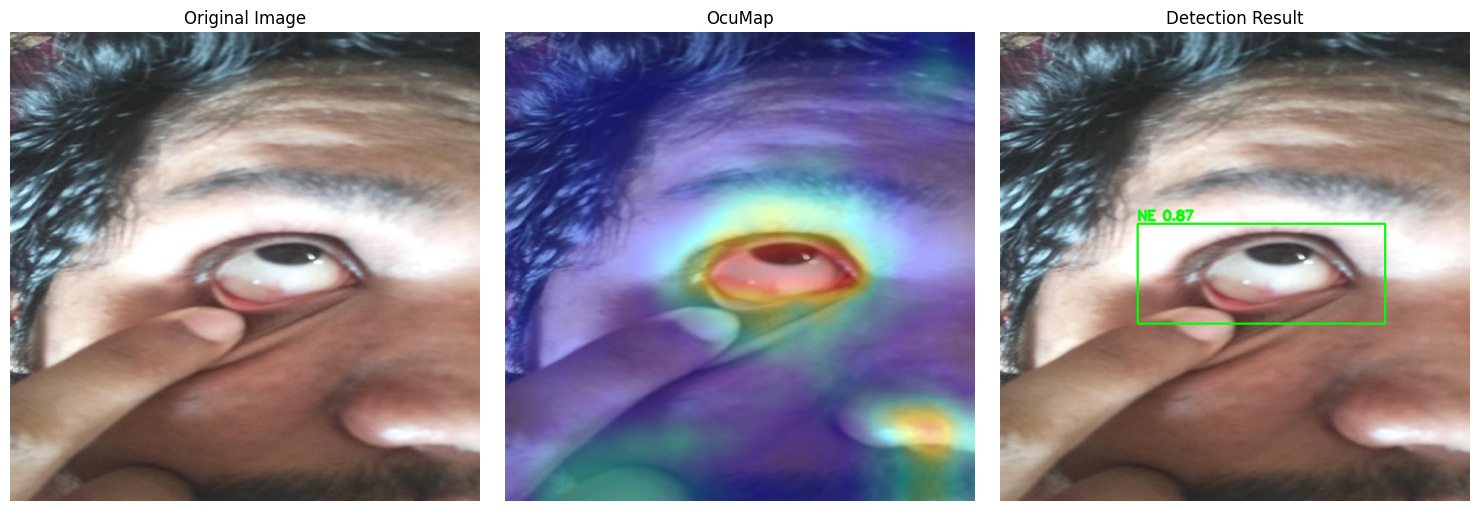

[OK] Saved panels for: NE

All done. Outputs in: /content/OcuMap_outputs


In [21]:
# -*- coding: utf-8 -*-
import os
from pathlib import Path
import cv2
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

# =======================
# CONFIG
# =======================
WEIGHTS = "/content/data/YOLO_OcuLite.pt"
IMAGE_PATHS = [
    "/content/data/APE.jpg",
    "/content/data/BPE.jpg",
    "/content/data/VPE.jpg",
    "/content/data/NE.jpg"
]
OUT_DIR = "/content/OcuMap_outputs"
CONF_THRESH = 0.10
IOU_THRESH  = 0.50
IMGSZ       = 640
SHOW        = True   # show inline

# -----------------------
# OcuMap (Eigen-like) knobs
# -----------------------
OCUMAP_N_COMPONENTS = 1      # 1 is standard EigenCAM
OCUMAP_CLIP_P       = (2,98) # clamp extremes
OCUMAP_GAUSS_K      = 7      # blur kernel (odd), 0 to disable
ALPHA               = 0.35   # overlay opacity
SHOW_BOX            = False  # draw boxes on the OcuMap panel too?

# =======================
# HELPERS
# =======================
def ensure_dir(p: str) -> str:
    Path(p).mkdir(parents=True, exist_ok=True); return p

def load_bgr(path: str):
    im = cv2.imread(path)
    if im is None:
        raise FileNotFoundError(f"Could not read image: {path}")
    return im

def bgr2rgb(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def pick_semantic_layer_before_detect(model: YOLO):
    """Choose a late conv/C2f just before Detect (works well for CAM)."""
    seq = list(model.model.model)
    det_idx = None
    for i, m in enumerate(seq):
        if m.__class__.__name__.lower() in ("detect","pose","obb","segment"):
            det_idx = i; break
    if det_idx is None:
        for idx in reversed(range(len(seq))):
            n = seq[idx].__class__.__name__.lower()
            if "c2f" in n or "conv" in n: return seq[idx]
        return seq[-2] if len(seq) > 1 else seq[-1]
    for idx in range(det_idx-1, -1, -1):
        n = seq[idx].__class__.__name__.lower()
        if "c2f" in n or "conv" in n: return seq[idx]
    return seq[det_idx-1]

def draw_detections(im_bgr, boxes_xyxy, confs, clss, names_map):
    im = im_bgr.copy()
    for i in range(len(boxes_xyxy)):
        if confs[i] < CONF_THRESH:
            continue
        x1,y1,x2,y2 = map(int, boxes_xyxy[i])
        label = f"{names_map.get(int(clss[i]), str(int(clss[i])))} {confs[i]:.2f}"
        cv2.rectangle(im, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(im, label, (x1, max(0, y1-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
    return im

def resize_norm01(arr, out_wh):
    W,H = out_wh
    m0, m1 = float(arr.min()), float(arr.max())
    arr = (arr - m0) / (m1 - m0 + 1e-8) if m1 > m0 else np.zeros_like(arr)
    arr = cv2.resize(arr, (W, H), interpolation=cv2.INTER_CUBIC)
    m0, m1 = float(arr.min()), float(arr.max())
    return (arr - m0) / (m1 - m0 + 1e-8)

def build_ocumap(act: torch.Tensor, out_wh, n_components=1):
    """
    OcuMap via Eigen-style SVD on activations:
      ReLU -> SVD on (H*W, C) -> |U| mean of first 'n_components' -> clamp -> blur -> 0..1
    """
    if act.is_cuda: act = act.detach().cpu()
    act = torch.nn.functional.relu(act)            # (C,H,W)
    C,H,W = act.shape
    if H*W == 0:
        return np.zeros(out_wh, dtype=np.float32)

    X = act.permute(1,2,0).reshape(-1, C).numpy()  # (H*W, C)
    try:
        U,S,Vt = np.linalg.svd(X, full_matrices=False)
        cam = np.abs(U[:, :n_components]).mean(axis=1).reshape(H, W)
    except np.linalg.LinAlgError:
        cam = act.mean(dim=0).numpy()

    lo, hi = np.percentile(cam, OCUMAP_CLIP_P)
    cam = np.clip(cam, lo, hi)
    cam = (cam - lo) / (hi - lo + 1e-8)
    cam = resize_norm01(cam, out_wh)

    if OCUMAP_GAUSS_K and OCUMAP_GAUSS_K >= 3:
        k = OCUMAP_GAUSS_K if OCUMAP_GAUSS_K % 2 else OCUMAP_GAUSS_K + 1
        cam = cv2.GaussianBlur(cam, (k,k), 0)

    m0, m1 = float(cam.min()), float(cam.max())
    return (cam - m0) / (m1 - m0 + 1e-8)

def apply_heat_on_rgb(im_rgb_float, heat_01, alpha=ALPHA):
    """Overlay JET heat on a float RGB [0..1] image."""
    heat_color = cv2.applyColorMap((heat_01*255).astype(np.uint8), cv2.COLORMAP_JET)
    heat_color = cv2.cvtColor(heat_color, cv2.COLOR_BGR2RGB).astype(np.float32)/255.0
    overlay = (alpha*heat_color + (1.0-alpha)*im_rgb_float).clip(0,1)
    return (overlay*255).astype(np.uint8)

def display_images(imagelist):
    """All inputs should be RGB uint8 for matplotlib."""
    titles = ["Original Image", "OcuMap", "Detection Result"]
    plt.figure(figsize=(15,5))
    for i,img in enumerate(imagelist):
        plt.subplot(1,len(imagelist),i+1)
        plt.imshow(img)
        plt.title(titles[i]); plt.axis("off")
    plt.tight_layout()
    if SHOW: plt.show()
    plt.close()

# =======================
# MAIN
# =======================
def main():
    ensure_dir(OUT_DIR)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"[LOAD] Weights: {WEIGHTS}")
    model = YOLO(WEIGHTS)

    names = model.names
    if isinstance(names, list):
        names = {i:n for i,n in enumerate(names)}

    # hook a good feature layer
    target_layer = pick_semantic_layer_before_detect(model)
    cached_act = {}
    def hook_fn(module, inp, out): cached_act["feat"] = out.detach()
    hook_handle = target_layer.register_forward_hook(hook_fn)

    print(f"[INFER] Processing {len(IMAGE_PATHS)} image(s) on {device}")
    for img_path in IMAGE_PATHS:
        try:
            results = model.predict(source=img_path, imgsz=IMGSZ,
                                    conf=CONF_THRESH, iou=IOU_THRESH,
                                    save=False, verbose=False,
                                    device=0 if device.type=="cuda" else "cpu")
            res = results[0]

            stem = Path(img_path).stem
            im_bgr = load_bgr(img_path)
            H0, W0 = im_bgr.shape[:2]
            im_rgb = bgr2rgb(im_bgr)  # original for display
            im_rgb_float = im_rgb.astype(np.float32)/255.0

            # Get activations from hook
            act = cached_act["feat"][0]   # (C,H,W)

            # OcuMap saliency + overlay
            heat = build_ocumap(act, out_wh=(W0, H0), n_components=OCUMAP_N_COMPONENTS)
            ocumap_rgb = apply_heat_on_rgb(im_rgb_float, heat_01=heat, alpha=ALPHA)

            # Detections (BGR -> draw -> RGB so colors stay correct)
            boxes = np.zeros((0,4)); confs = np.array([]); clss = np.array([])
            if res.boxes is not None and len(res.boxes) > 0:
                boxes = res.boxes.xyxy.cpu().numpy()
                confs = res.boxes.conf.cpu().numpy()
                clss  = res.boxes.cls.cpu().numpy().astype(int)
            det_bgr = draw_detections(im_bgr, boxes, confs, clss, names)
            det_rgb = bgr2rgb(det_bgr)  # keep natural colors

            # (optional) boxes on OcuMap panel
            ocumap_panel = ocumap_rgb.copy()
            if SHOW_BOX and len(boxes) > 0:
                for i in range(len(boxes)):
                    if confs[i] < CONF_THRESH: continue
                    x1,y1,x2,y2 = map(int, boxes[i])
                    label = f"{names.get(int(clss[i]), str(int(clss[i])))} {confs[i]:.2f}"
                    cv2.rectangle(ocumap_panel, (x1,y1), (x2,y2), (0,255,0), 2)
                    cv2.putText(ocumap_panel, label, (x1, max(0,y1-5)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)

            # show triptych
            imagelist = [im_rgb, ocumap_panel if SHOW_BOX else ocumap_rgb, det_rgb]
            display_images(imagelist)

            # save triptych panels
            names_list = ["original","ocumap","detections"]
            for idx, img in enumerate(imagelist):
                Image.fromarray(img.astype(np.uint8)).save(
                    os.path.join(OUT_DIR, f"{stem}_{names_list[idx]}.png")
                )

            print(f"[OK] Saved panels for: {stem}")

        except Exception as e:
            print(f"[ERROR] {img_path}: {e}")

    hook_handle.remove()
    print(f"\nAll done. Outputs in: {OUT_DIR}")

if __name__ == "__main__":
    main()
